# Multilayer Perceptron

The Multilayer Perceptron is a neural network where the mapping between inputs and output is non-linear. A Multilayer Perceptron has input and output layers, and one or more hidden layers with many neurons stacked together. And while in the Perceptron the neuron must have an activation function that imposes a threshold, like ReLU or sigmoid, neurons in a Multilayer Perceptron can use any arbitrary activation function. Each layer is feeding the next one with the result of their computation, their internal representation of the data. This goes all the way through the hidden layers to the output layer.

But it has more to it. If the algorithm only computed the weighted sums in each neuron, propagated results to the output layer, and stopped there, it wouldn’t be able to learn the weights that minimize the cost function. If the algorithm only computed one iteration, there would be no actual learning.

<img src= "https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single.jpg" width=450 height=250/>

### Objective

**To experiment with different hyperparameters and analyse the model with the help of validation and training accuracy and losses. Build a good model with best hyperparameters to maximize accuracy.**

In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [2]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Function to create and train an MLP model
def create_mlp_model(num_hiddens, activation_function, optimizer, learning_rate):
    model = Sequential()
    
    # Input layer
    model.add(Dense(num_hiddens[0], input_dim=X_train.shape[1], activation=activation_function))
    
    # Hidden layers
    for units in num_hiddens[1:]:
        model.add(Dense(units, activation=activation_function))
    
    # Output layer
    model.add(Dense(3, activation='softmax'))  # 3 output classes for IRIS dataset
    
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate=learning_rate), metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    return model, history

In [8]:
# Function to plot accuracy and loss
def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Common Patterns in interpreting Accuracy and Loss:

- **Overfitting:** If the training accuracy is much higher than the validation accuracy, and the training loss is much lower than the validation loss, it suggests overfitting. The model is memorizing the training data but not generalizing well.


- **Underfitting:** If both training and validation accuracies are low, and the training and validation losses are high, it suggests underfitting. The model is not capturing the patterns in the data.


- **Good Fit:** A model with good generalization typically shows both increasing training and validation accuracies, along with decreasing training and validation losses.


- **Learning Rate Issues:** If the curves show erratic behavior, it might be worth experimenting with the learning rate. Too high of a learning rate might cause the model to oscillate or diverge, while too low of a learning rate might result in slow convergence.

**Good Generalization:** 

- **Similar Learning Patterns:** When the training and validation accuracy curves closely follow each other and almost overlap, it indicates that the model is learning the patterns present in the training data and generalizing well to the validation data.


- **No Overfitting or Underfitting:** Overfitting occurs when the model learns the training data too well but fails to generalize to new data. Underfitting happens when the model hasn't learned enough from the training data. When the curves overlap, it suggests a balanced model that neither underfits nor overfits.

**Curves reaching plateau after a point**

- **Convergence Reached:** The model has learned all it can from the available data, reaching its maximum potential accuracy given the complexity of the problem and the information present in the dataset.


- **Model Saturated:** The model has reached its capacity to learn from the given data. Further training does not significantly improve its performance.


- **Underfitting or Insufficient Complexity:** If both training and validation accuracies plateau at a low value, it suggests that the model might be too simple (insufficient complexity) to capture the underlying patterns in the data.


- **Overfitting and Model Stability:** If both curves plateau at high accuracies but with a gap between them, it could indicate a stable model but with a potential overfitting issue. The model performs well on training data but less so on unseen validation data

### 1. Experimenting with different number of hidden units

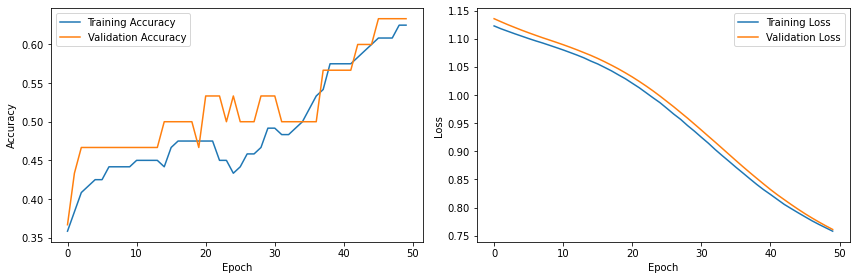

1/1 [==============================] - 0s 96ms/step
Number of Hidden Units: 4, Accuracy: 0.6333333333333333


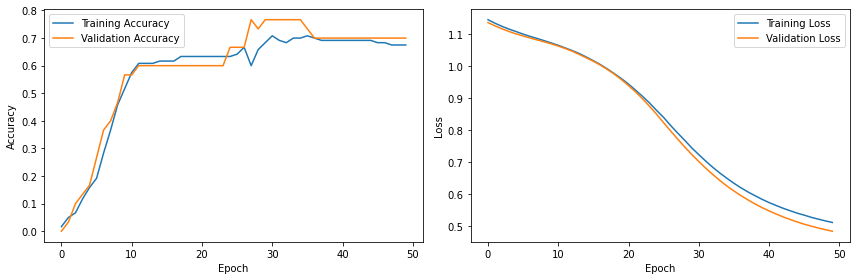

1/1 [==============================] - 0s 65ms/step
Number of Hidden Units: 8, Accuracy: 0.7


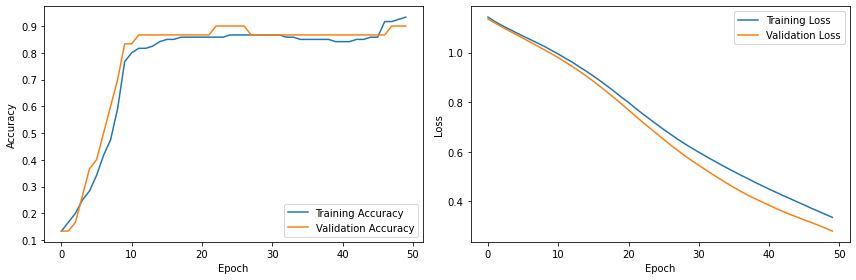

1/1 [==============================] - 0s 54ms/step
Number of Hidden Units: 12, Accuracy: 0.9


In [9]:
num_hidden_units_list = [4, 8, 12]

for num_hidden_units in num_hidden_units_list:
    model, history = create_mlp_model([num_hidden_units, num_hidden_units, num_hidden_units], 'relu', tf.keras.optimizers.Adam, 0.001)
    plot_metrics(history)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Number of Hidden Units: {num_hidden_units}, Accuracy: {accuracy}")

### Interpretation training and validation accuracy and loss curves based on different numbers of hidden units

**1. Fewer Hidden Units - Accuracy/Loss:**
  - The model might struggle to capture complex patterns in the data, leading to slower convergence in training accuracy and loss reduction. 
  - Might lead to underfitting.


**2. Moderate Number of Hidden Units - Accuracy/Loss:**
  - Strikes a balance between model complexity and computational efficiency.
  - Showing a relatively smooth increase in training accuracy and decrease in loss.


**3. Larger Number of Hidden Units - Accuracy/Loss:**
  - Potentially leading to faster convergence in training accuracy and loss reduction.
  - Higher capacity might lead to overfitting if not regularized properly.

### Inference

**1. Number of Hidden Units: 4 -  Accuracy: 0.9:** The training and validation accuracy curves are increasing continuously. In the later phases, the model begins to learn more generalizable features that apply to both the training and validation sets, leading to improved performance on the validation set and potentially surpassing the training accuracy. The losses are decreasing continuously and are close to each other. 


**2. Number of Hidden Units: 8 -  Accuracy: 0.9:** The training and validation accuracy curves are increasing continuously in the early phase and reaches a plateau at higher accuracies. Since they are close to each other, it is a good model without overfitting. The losses are decreasing continuously and are close to each other. 


**3. Number of Hidden Units: 12 -  Accuracy: 0.93:** The validation accuracy plateauing at 0.9, which is higher than the training accuracy, indicates that the model is generalizing exceptionally well to unseen data. The validation loss is lesser than training loss which means that the model is a good fit.

### 2. Experimenting with different learning rates

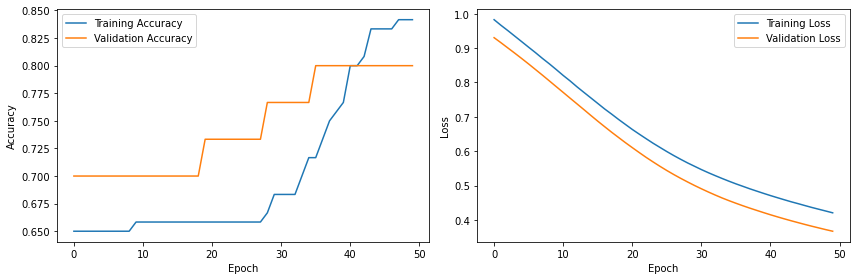

1/1 [==============================] - 0s 52ms/step
Learning Rate: 0.001, Accuracy: 0.8


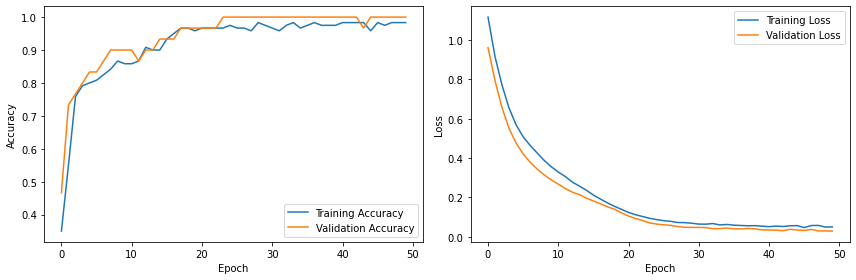

1/1 [==============================] - 0s 47ms/step
Learning Rate: 0.01, Accuracy: 1.0


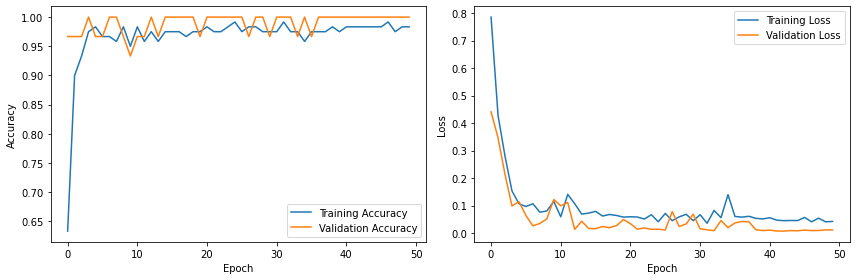

1/1 [==============================] - 0s 48ms/step
Learning Rate: 0.1, Accuracy: 1.0


In [10]:
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    model, history = create_mlp_model([8, 8], 'relu', tf.keras.optimizers.Adam, lr)
    plot_metrics(history)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy}")

### Interpretation training and validation accuracy and loss curves based on different learning rates

**1. High Learning Rate:**
- Initially, training accuracy might increase quickly, and training loss might decrease rapidly. However, as the learning rate is too high, the model might overshoot the optimal point, causing oscillations or even divergence in accuracy and loss.

**2. Low Learning Rate:**
- Training might converge slowly, with accuracy and loss decreasing steadily but possibly requiring more epochs to reach convergence.

**3. Moderate Learning Rate:**
- A balanced learning rate facilitates steady convergence in training accuracy and loss without extreme fluctuations.

### Inference

**1.Lower Learning Rate: 0.001, Accuracy: 0.9** - The training and validation accuracy curves are increasing continuously. In the later phases, the model begins to learn more generalizable features that apply to both the training and validation sets, leading to improved performance on the validation set and potentially surpassing the training accuracy. The losses are decreasing continuously and are converging closely. 

**2. Moderate Learning Rate: 0.01, Accuracy: 1.0** - The training and validation accuracy curves are increasing continuously in the early phase and reaches a plateau at higher accuracies. Since they are close to each other, it is a good model without overfitting. The losses are decreasing continuously and reaches a plateau at lower loss. 

**3.  High Learning Rate: 0.1, Accuracy: 1.0** -  The sharp rise and fall in validation loss signify a brief period where the model's generalization faltered, possibly due to overfitting or transient issues with the dataset. However, the model's ability to recover quickly indicates its resilience and capacity to adapt. Same with accuracy.

### 3. Experimenting with different activation functions

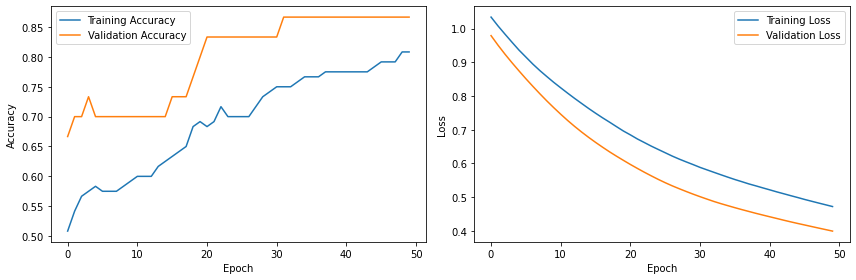

1/1 [==============================] - 0s 44ms/step
Activation Function: relu, Accuracy: 0.8666666666666667


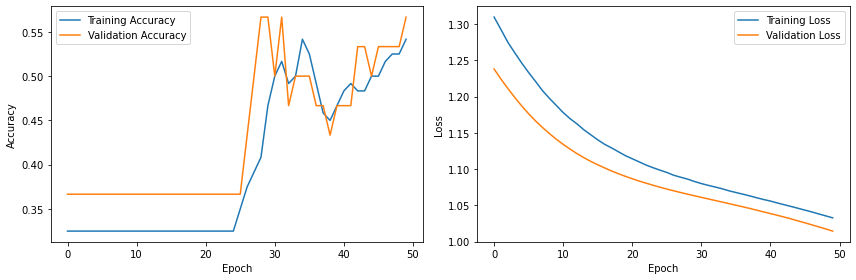

1/1 [==============================] - 0s 48ms/step
Activation Function: sigmoid, Accuracy: 0.5666666666666667


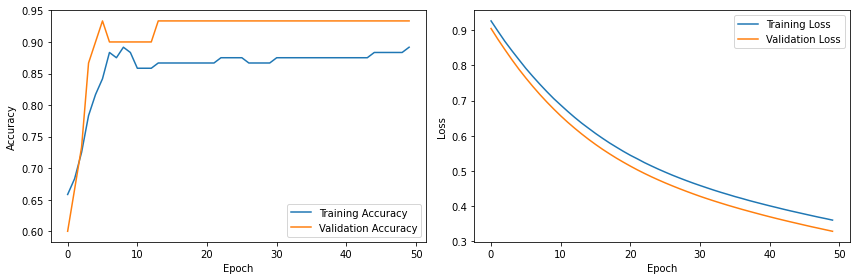

1/1 [==============================] - 0s 49ms/step
Activation Function: tanh, Accuracy: 0.9333333333333333


In [11]:
activation_functions = ['relu', 'sigmoid', 'tanh']

for activation_function in activation_functions:
    model, history = create_mlp_model([8, 8], activation_function, tf.keras.optimizers.Adam, 0.001)
    plot_metrics(history)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Activation Function: {activation_function}, Accuracy: {accuracy}")

### Interpretation training and validation accuracy and loss curves based on different activation functions

**ReLU**
- ReLU is known for faster convergence and better performance in many cases, leading to a quick increase in training accuracy.
- ReLU often generalizes well, resulting in a rapid increase in validation accuracy.
- Training Loss: Convergence is faster with ReLU, leading to a quick decrease in training loss.


**Sigmoid**
- Sigmoid activation is commonly used in the output layer for binary classification problems.
- Training accuracy tends to increase during training, but convergence might be slower compared to other activation functions.
- Sigmoid can sometimes lead to slower convergence, and the training loss might decrease gradually.


**Hyperbolic Tangent (tanh)**
- tanh is often more effective than sigmoid, and training accuracy tends to increase faster.
- Faster convergence compared to sigmoid, leading to quicker improvement in validation accuracy.
- tanh can help converge faster, resulting in a quicker decrease in training loss.

### Inference

**1. Activation Function: relu, Accuracy: 0.93** - The training and validation accuracy curves are increasing continuously. In the later phases, the model begins to learn more generalizable features that apply to both the training and validation sets, leading to improved performance on the validation set and potentially surpassing the training accuracy. The losses are decreasing continuously and are converging closely.

**2. Activation Function: sigmoid, Accuracy: 0.9** - The training and validation accuracy curves are increasing continuously in the early phase and reaches a plateau at higher accuracies. Since they are close to each other, it is a good model without overfitting. The losses are decreasing continuously and are converging closely.

**3. Activation Function: tanh, Accuracy: 0.96** -  The training and validation accuracy curves are increasing continuously in the early phase and reaches a plateau and rise again. Since they almost converging, it is a good model without overfitting.  Overlapping training and validation losses indicate a model that learns consistently from both datasets, demonstrating good generalization without signs of overfitting or underfitting. 

### 4. Experimenting with different optimizers and loss functions

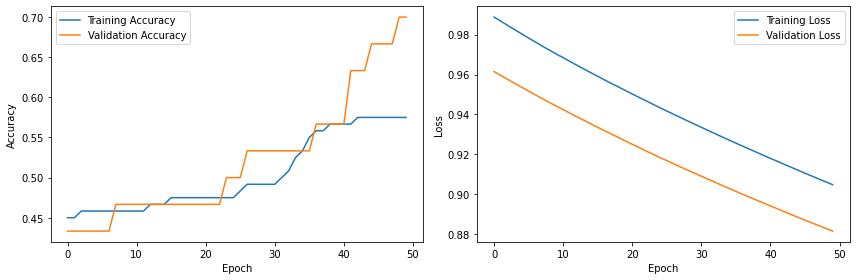

1/1 [==============================] - 0s 47ms/step
Optimizer: SGD, Loss Function: sparse_categorical_crossentropy, Accuracy: 0.7


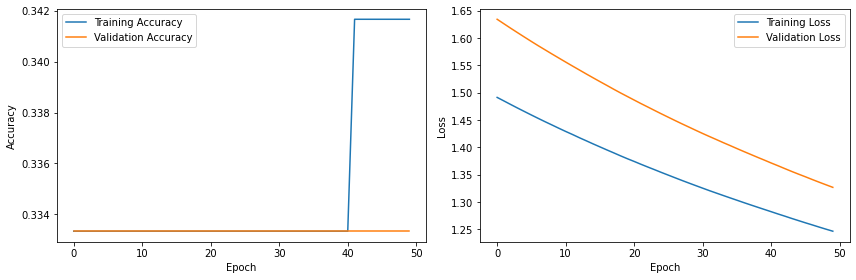

1/1 [==============================] - 0s 43ms/step
Optimizer: SGD, Loss Function: categorical_crossentropy, Accuracy: 0.3333333333333333


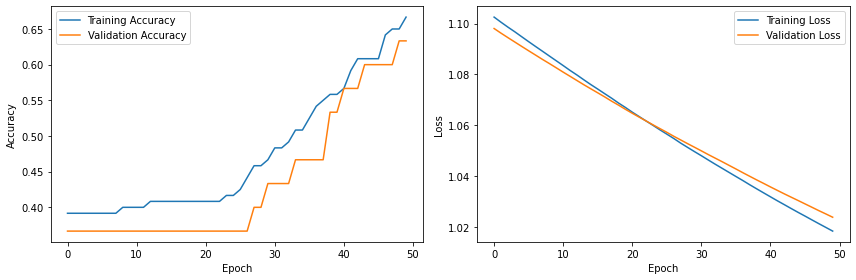

1/1 [==============================] - 0s 46ms/step
Optimizer: SGD, Loss Function: mean_squared_error, Accuracy: 0.6333333333333333


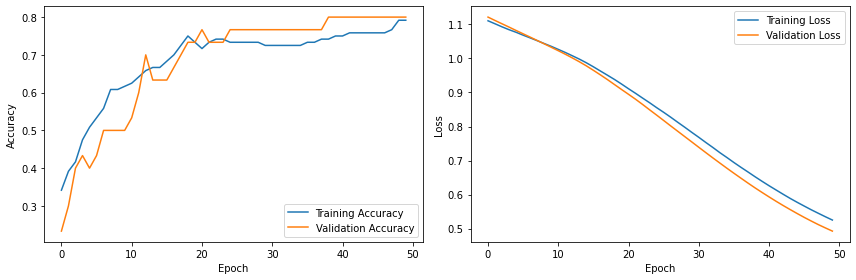

1/1 [==============================] - 0s 44ms/step
Optimizer: Adam, Loss Function: sparse_categorical_crossentropy, Accuracy: 0.8


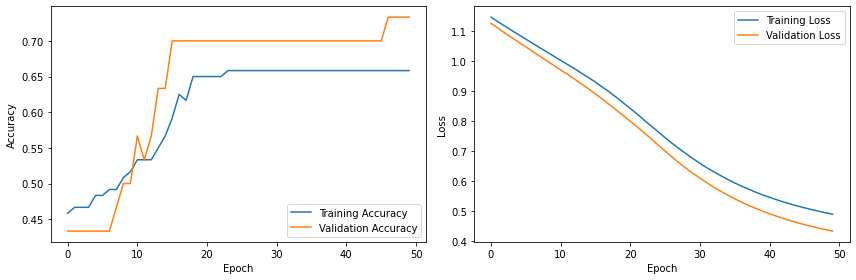

1/1 [==============================] - 0s 50ms/step
Optimizer: Adam, Loss Function: categorical_crossentropy, Accuracy: 0.7333333333333333


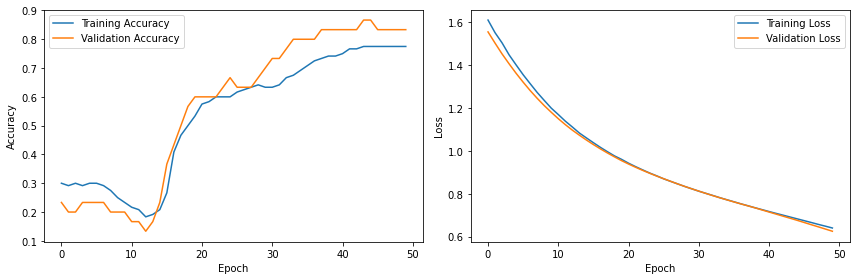

1/1 [==============================] - 0s 45ms/step
Optimizer: Adam, Loss Function: mean_squared_error, Accuracy: 0.8333333333333334


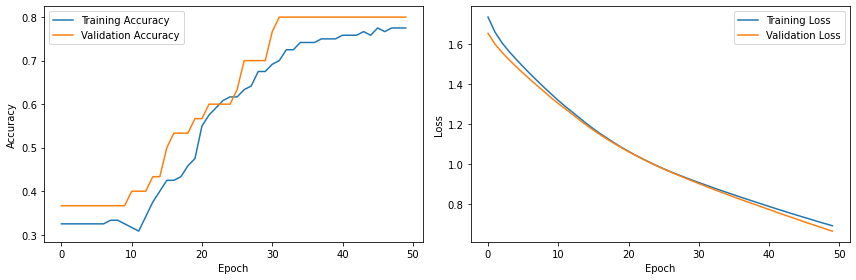

1/1 [==============================] - 0s 45ms/step
Optimizer: RMSprop, Loss Function: sparse_categorical_crossentropy, Accuracy: 0.8


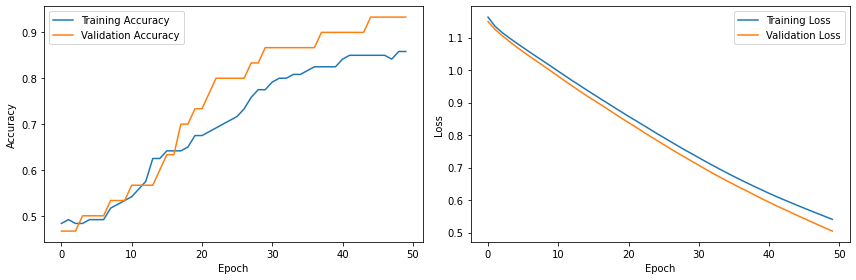

1/1 [==============================] - 0s 58ms/step
Optimizer: RMSprop, Loss Function: categorical_crossentropy, Accuracy: 0.9333333333333333


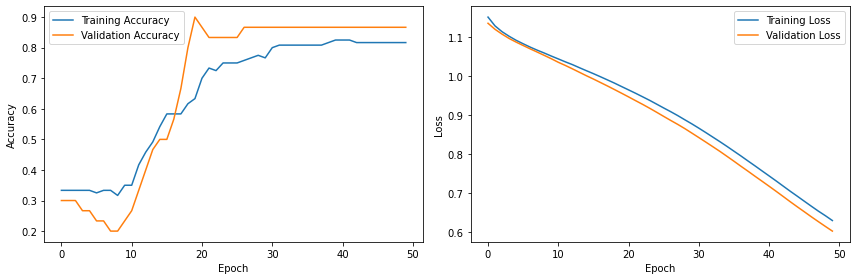

1/1 [==============================] - 0s 47ms/step
Optimizer: RMSprop, Loss Function: mean_squared_error, Accuracy: 0.8666666666666667


In [12]:
optimizers = [tf.keras.optimizers.SGD, tf.keras.optimizers.Adam, tf.keras.optimizers.RMSprop]
loss_functions = ['sparse_categorical_crossentropy', 'categorical_crossentropy', 'mean_squared_error']

for optimizer in optimizers:
    for loss_function in loss_functions:
        model, history = create_mlp_model([8, 8], 'relu', optimizer, 0.001)
        plot_metrics(history)
        y_pred = np.argmax(model.predict(X_test), axis=1)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Optimizer: {optimizer.__name__}, Loss Function: {loss_function}, Accuracy: {accuracy}")

*Optimizers*

**Stochastic Gradient Descent (SGD) Optimizer**
- Convergence with SGD can be slower compared to more advanced optimizers.
- SGD might take more time to converge, leading to a gradual decrease in training loss.

**Adam Optimizer**
- Adam is known for faster convergence, leading to a quick increase in training accuracy.
- Adam can converge faster, leading to a quick decrease in training loss.

**RMSprop Optimizer**
- RMSprop provides a balance between SGD and Adam in terms of convergence speed. Training accuracy increases moderately.
- Convergence is moderate, resulting in a gradual decrease in training loss.

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

*Loss Function*

**Mean Squared Error (MSE)**
- MSE is often used in regression tasks. 
- Training accuracy might not be directly applicable; metrics like R-squared are more meaningful for regression.

**Categorical Crossentropy**
- Commonly used for multi-class classification. Training accuracy tends to increase steadily as the model learns to classify instances into multiple classes.
- Training Loss: Decreases as the model learns to minimize categorical crossentropy.

The above curves show that Adam optimizer gives the best accuracy and the losses also decrease contiuously.

## Building a model with hyperparameter tuning

In [13]:
# Function to create a Keras model
def create_model(optimizer='adam', activation='relu', neurons=8, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(3, activation='softmax'))  # 3 units for the 3 classes in Iris dataset

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# Create KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=5, verbose=0)

C:\Users\Prath\AppData\Local\Temp\ipykernel_960\3453890804.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=5, verbose=0)


In [15]:
params = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': [4, 8, 16],
    'learning_rate' : [0.001,0.01,0.1]
}

In [16]:
grid = GridSearchCV(estimator=keras_model, param_grid=params, cv=3, scoring='accuracy')

In [17]:
grid_result = grid.fit(X_train, y_train)

2/2 [==============================] - 0s 5ms/step


In [26]:
results_df = pd.DataFrame(grid_result.cv_results_)

# Display the hyperparameters and corresponding mean test scores (accuracy)
results_df[['param_optimizer', 'param_activation', 'param_neurons','param_learning_rate', 'mean_test_score']]

,param_optimizer,param_activation,param_neurons,param_learning_rate,mean_test_score
0,adam,relu,4,0.001,0.691667
1,rmsprop,relu,4,0.001,0.658333
2,adam,relu,8,0.001,0.783333
3,rmsprop,relu,8,0.001,0.875000
4,adam,relu,16,0.001,0.833333
5,rmsprop,relu,16,0.001,0.833333
6,adam,relu,4,0.01,0.508333
7,rmsprop,relu,4,0.01,0.733333
8,adam,relu,8,0.01,0.808333
9,rmsprop,relu,8,0.01,0.816667


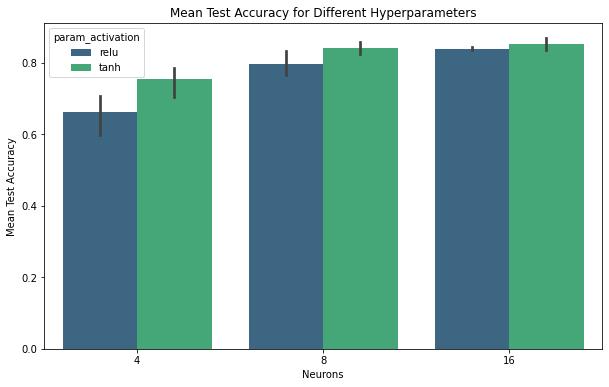

In [27]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(x='param_neurons', y='mean_test_score', hue='param_activation', data=results_df, palette='viridis')
plt.title('Mean Test Accuracy for Different Hyperparameters')
plt.xlabel('Neurons')
plt.ylabel('Mean Test Accuracy')
plt.show()

In [28]:
# Print best parameters and best score
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Best Parameters:  {'activation': 'relu', 'learning_rate': 0.001, 'neurons': 8, 'optimizer': 'rmsprop'}
Best Accuracy:  0.875


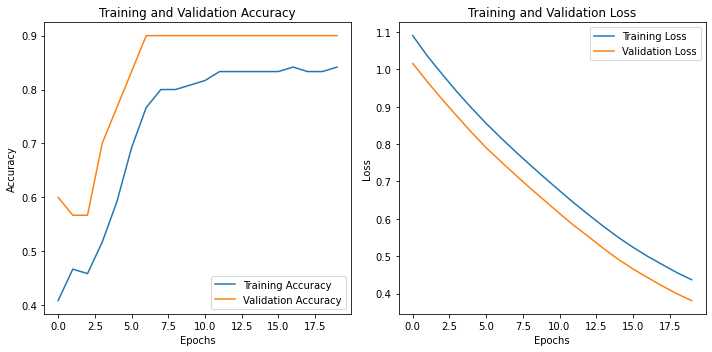

In [29]:
# Create a new model using the best parameters
best_model = create_model(optimizer='rmsprop', activation='relu', neurons='8', learning_rate=0.001)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=20, batch_size=5, validation_data=(X_test, y_test), verbose=0)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Conclusion

In this exercise we have learnt about the hyper parameters and their impact on accuracy and learnt to interpret the accuracy and loss curves. We have understood the working of different hyperparameters like activation function, optimizers, learning rate, number neurons. In the end we built a model with best hyperparameters to increase accuracy. We used GridSearchCV for the model evaluation and achieved an accuracy of 87.5%.  The curves show a promising trend with increasing accuracy and decreasing losses with the number of epochs.